#  Imports

In [1]:
# --- Environment (must be set before importing jax) ---
import os
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = ".99"
import jax
import mmml
import numpy as np
import matplotlib.pyplot as plt
print(jax.devices())
data = np.load("data-full.npz", allow_pickle=True)
data.keys()

[CudaDevice(id=0)]


KeysView(NpzFile 'data-full.npz' with keys: R, Z, D, E, F...)

(array([1.000e+00, 2.000e+00, 4.000e+00, 2.200e+01, 1.100e+02, 3.610e+02,
        1.406e+03, 5.138e+03, 2.812e+03, 1.440e+02]),
 array([-122.3832296 , -122.17967484, -121.97612007, -121.77256531,
        -121.56901054, -121.36545578, -121.16190101, -120.95834624,
        -120.75479148, -120.55123671, -120.34768195]),
 <BarContainer object of 10 artists>)

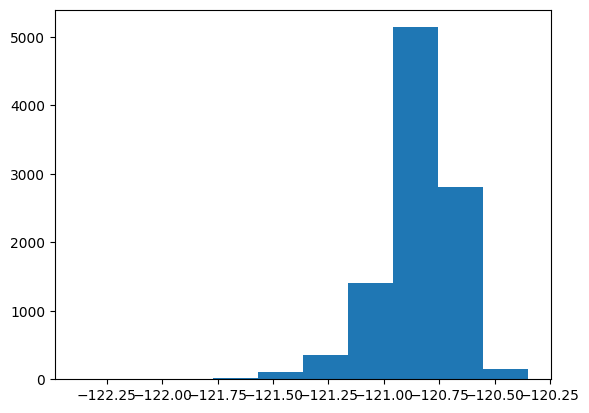

In [2]:
plt.hist(data["E"])

In [3]:
data["P"][2:5]

array([[[[153.795, 9.633, 16.308],
         [9.633, 145.973, 6.787],
         [16.308, 6.787, 132.068]]],


       [[[153.445, -8.581, -16.231],
         [-8.581, 147.001, 6.008],
         [-16.231, 6.008, 133.728]]],


       [[[154.792, 9.179, 15.629],
         [9.179, 146.469, 7.169],
         [15.629, 7.169, 132.559]]]], dtype=object)

In [4]:

# data["D"]
D = np.array(data["D"], dtype=float)
Ef =  np.array(data["Ef"], dtype=float)

In [5]:
D_mag = np.linalg.norm(D, axis=-1)

Ef_mag = np.linalg.norm(Ef, axis=-1)

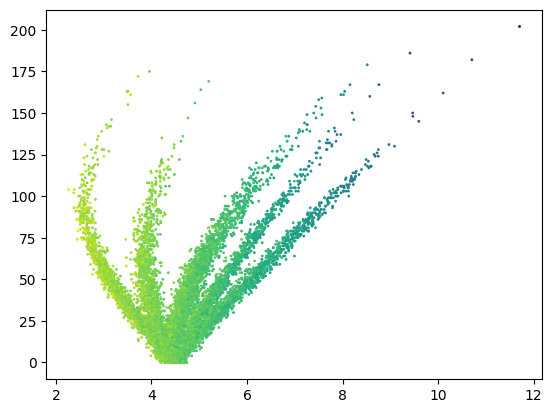

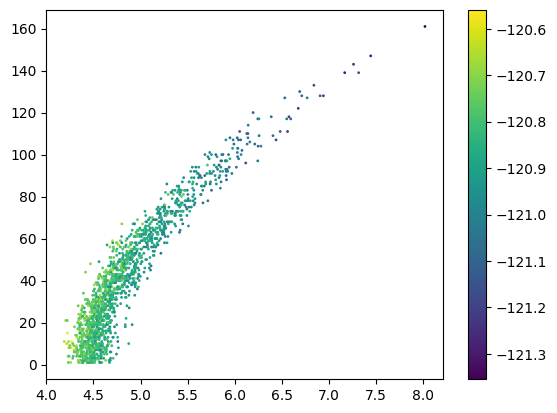

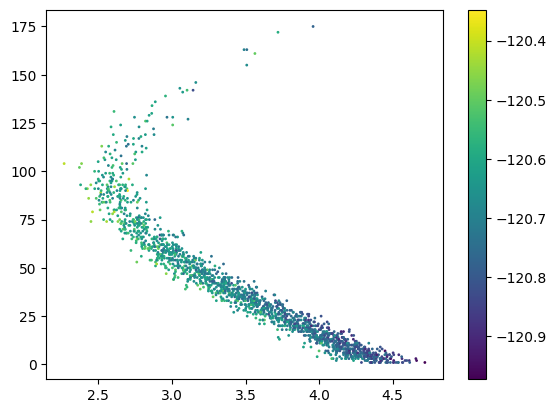

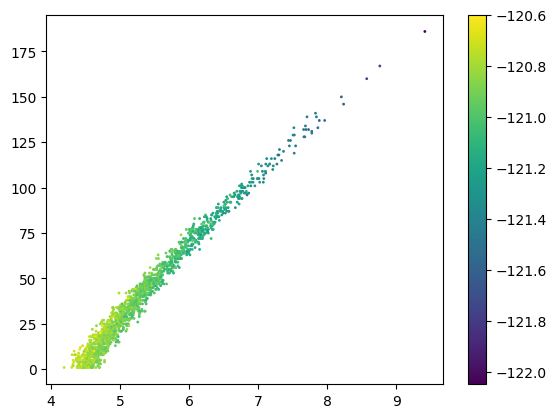

In [6]:
mask = None
s = plt.scatter(D_mag[mask], Ef_mag[mask], c=data["E"][mask], cmap="viridis", s=1)
plt.show()
mask = data["Ef"][:,0] > 0

s = plt.scatter(D_mag[mask], Ef_mag[mask], c=data["E"][mask], cmap="viridis", s=1)
plt.colorbar(s)
plt.show()
mask = data["Ef"][:,1] > 0
s = plt.scatter(D_mag[mask], Ef_mag[mask], c=data["E"][mask], cmap="viridis", s=1)
plt.colorbar(s)
plt.show()
mask = data["Ef"][:,2] > 0
s = plt.scatter(D_mag[mask], Ef_mag[mask], c=data["E"][mask], cmap="viridis", s=1)
plt.colorbar(s)

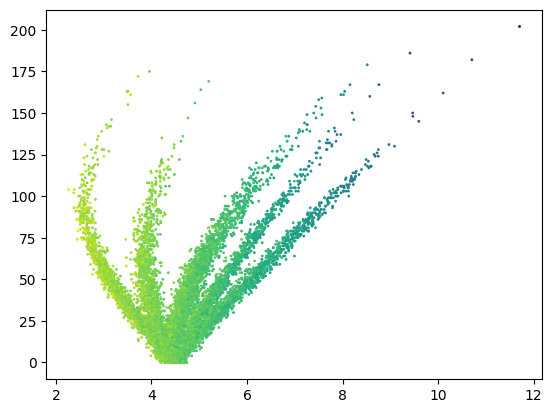

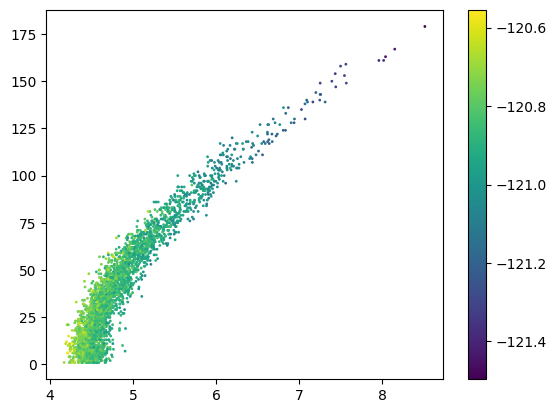

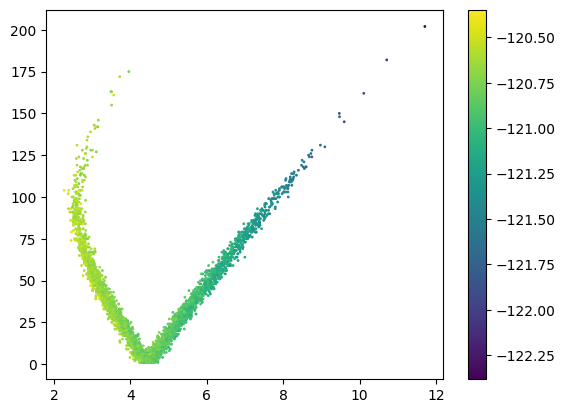

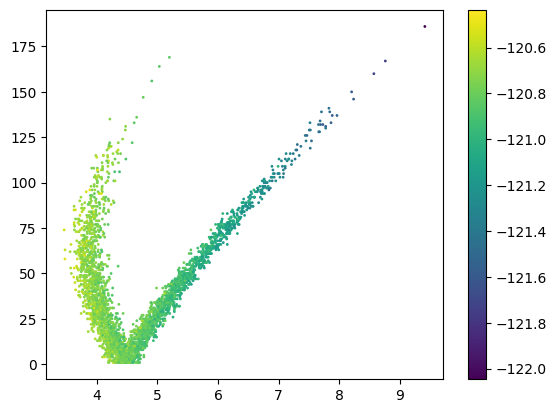

In [7]:
mask = None
s = plt.scatter(D_mag[mask], Ef_mag[mask], c=data["E"][mask], cmap="viridis", s=1)
plt.show()
mask = data["Ef"][:,0] != 0

s = plt.scatter(D_mag[mask], Ef_mag[mask], c=data["E"][mask], cmap="viridis", s=1)
plt.colorbar(s)
plt.show()
mask = data["Ef"][:,1] !=  0
s = plt.scatter(D_mag[mask], Ef_mag[mask], c=data["E"][mask], cmap="viridis", s=1)
plt.colorbar(s)
plt.show()
mask = data["Ef"][:,2] !=  0
s = plt.scatter(D_mag[mask], Ef_mag[mask], c=data["E"][mask], cmap="viridis", s=1)
plt.colorbar(s)

In [8]:
params = "params-e2db485b-db37-408f-b5bd-6c10dc8093c2.json"
data ="data-full-flipped.npz"

# Training

In [31]:
from training import *
params = "params-5c3df90a-0b8a-4168-8f24-ab0c778cbd0f.json"
data ="data-full.npz"
# Option 2: Override specific parameters
args = get_args(
    data=data,
    restart=params,
    features=32,
    max_degree=3,
    num_iterations=2,
    num_basis_functions=16,
    cutoff=10.0,
    num_train=4000,
    num_valid=100,
    num_epochs=100,
    learning_rate=0.0001,
    batch_size=8,
    clip_norm=1.0,
    ema_decay=0.5,
    early_stopping_patience=None,
    early_stopping_min_delta=0.0,
    reduce_on_plateau_patience=5,
    reduce_on_plateau_cooldown=5,
    reduce_on_plateau_factor=0.9,
    reduce_on_plateau_rtol=1e-4,
    reduce_on_plateau_accumulation_size=5,
    reduce_on_plateau_min_scale=0.01,
    energy_weight=1.0,
    forces_weight=100.0,
    dipole_weight=1.0,
    charge_weight=0.1,
    dipole_field_coupling=False,
    field_scale=0.001,
)

# Print arguments to verify
print("Arguments:")
for arg in vars(args):
    print(f"  {arg}: {getattr(args, arg)}")



Arguments:
  data: data-full.npz
  features: 32
  max_degree: 3
  num_iterations: 2
  num_basis_functions: 16
  cutoff: 10.0
  num_train: 4000
  num_valid: 100
  num_epochs: 100
  learning_rate: 0.0001
  batch_size: 8
  clip_norm: 1.0
  ema_decay: 0.5
  early_stopping_patience: None
  early_stopping_min_delta: 0.0
  reduce_on_plateau_patience: 5
  reduce_on_plateau_cooldown: 5
  reduce_on_plateau_factor: 0.9
  reduce_on_plateau_rtol: 0.0001
  reduce_on_plateau_accumulation_size: 5
  reduce_on_plateau_min_scale: 0.01
  restart: params-5c3df90a-0b8a-4168-8f24-ab0c778cbd0f.json
  energy_weight: 1.0
  forces_weight: 100.0
  dipole_weight: 1.0
  charge_weight: 0.1
  dipole_field_coupling: False
  field_scale: 0.001


In [32]:
from training import get_args, main
_ = main(args)

Arguments:
  data: data-full.npz
  features: 32
  max_degree: 3
  num_iterations: 2
  num_basis_functions: 16
  cutoff: 10.0
  num_train: 4000
  num_valid: 100
  num_epochs: 100
  learning_rate: 0.0001
  batch_size: 8
  clip_norm: 1.0
  ema_decay: 0.5
  early_stopping_patience: None
  early_stopping_min_delta: 0.0
  reduce_on_plateau_patience: 5
  reduce_on_plateau_cooldown: 5
  reduce_on_plateau_factor: 0.9
  reduce_on_plateau_rtol: 0.0001
  reduce_on_plateau_accumulation_size: 5
  reduce_on_plateau_min_scale: 0.01
  restart: params-5c3df90a-0b8a-4168-8f24-ab0c778cbd0f.json
  energy_weight: 1.0
  forces_weight: 100.0
  dipole_weight: 1.0
  charge_weight: 0.1
  dipole_field_coupling: False
  field_scale: 0.001
Hyperparameters:
  restart: params-5c3df90a-0b8a-4168-8f24-ab0c778cbd0f.json
  features: 32
  max_degree: 3
  num_iterations: 2
  num_basis_functions: 16
  cutoff: 10.0
  num_train: 4000
  num_valid: 100
  num_epochs: 100
  learning_rate: 0.0001
  batch_size: 8
  clip_norm: 1.0
 

In [33]:
params = "params-db24c0ff-00b6-4ba2-a93b-a8ba3e73db73.json"
# data ="data-full-flipped.npz"

# Evaluate

In [34]:

import jax
import mmml
import numpy as np
import matplotlib.pyplot as plt
print(jax.devices())

from evaluate import *
args = get_args(
    params=params,
    data=data,
    batch_size=100,
    output_dir="results"
)

[CudaDevice(id=0)]


In [ ]:
output = main(args)

Model Evaluation
Parameters: params-db24c0ff-00b6-4ba2-a93b-a8ba3e73db73.json
Data: data-full.npz
Output directory: results
Batch size: 100

Loading dataset from data-full.npz...
Dataset keys: ['R', 'Z', 'D', 'E', 'F', 'P', 'Ef']
Dataset shapes:
  R: (10000, 1, 29, 3)
  Z: (10000, 29)
  D: (10000, 3)
  E: (10000,)
  F: (10000, 1, 29, 3)
  P: (10000, 1, 3, 3)
  Ef: (10000, 3)

Loading parameters from params-db24c0ff-00b6-4ba2-a93b-a8ba3e73db73.json...
✓ Parameters loaded
✓ Found matching config file: config-db24c0ff-00b6-4ba2-a93b-a8ba3e73db73.json

Loading model config from config-db24c0ff-00b6-4ba2-a93b-a8ba3e73db73.json...
✓ Loaded model config from config-db24c0ff-00b6-4ba2-a93b-a8ba3e73db73.json
  Config UUID: db24c0ff-00b6-4ba2-a93b-a8ba3e73db73

Model configuration:
  max_degree: 3
  num_iterations: 2
  num_basis_functions: 16
  cutoff: 10.0
  max_atomic_number: 55
  include_pseudotensors: True
  features: 32
  dipole_field_coupling: False
  field_scale: 0.001

[STRUCT] loaded pa

In [ ]:
output.keys()


In [ ]:
output["errors_energy"] = output["energy_pred"] - output["energy_targets"]

In [ ]:
D_mag = np.linalg.norm(output["D"], axis=-1)

Ef_mag = np.linalg.norm(output["Ef"], axis=-1)

In [ ]:
s = plt.scatter(output["energy_targets"], output["energy_pred"], c=D_mag, s=Ef_mag/100)
plt.colorbar(s)

In [ ]:
s = plt.scatter(output["dipole_targets"][-1000:].reshape(-1,3)[:,0], 
                output["dipole_pred"][-1000:].reshape(-1,3)[:,0], s=1)
plt.colorbar(s)

In [ ]:
s = plt.scatter(output["dipole_targets"][-1000:].reshape(-1,3)[:,2], 
                output["dipole_pred"][-1000:].reshape(-1,3)[:,2], s=1)
plt.colorbar(s)

In [ ]:
s = plt.scatter(output["dipole_targets"][-1000:].reshape(-1,3)[:,1], 
                output["dipole_pred"][-1000:].reshape(-1,3)[:,1], s=1)
plt.colorbar(s)

In [ ]:
s = plt.scatter(output["energy_pred"], output["energy_targets"], c=Ef_mag, alpha=0.01)
plt.colorbar(s)

In [ ]:
s = plt.scatter(D_mag, Ef_mag, c=output["E"], cmap="viridis", s=1)
plt.colorbar(s)

In [ ]:
s = plt.scatter(D_mag, Ef_mag, c=output["energy_pred"], cmap="viridis", s=1)
plt.colorbar(s)

In [ ]:
s = plt.scatter(D_mag*Ef_mag, np.sqrt(output["errors_energy"]**2), c=output["E"], cmap="viridis", s=1, alpha=1)
plt.colorbar(s)

In [ ]:
23.06*((output["errors_energy"][Ef_mag > 50])**2).mean()**0.5

In [ ]:
((output["errors_energy"][Ef_mag < 25])**2).mean()